In [1]:
import e_net.functions as e_net
import networkx as nx
import pandas as pd
import numpy as np

Init Graphs

In [2]:
# City Parameter:
N_agents    = 100
city_x_len  = 100
city_y_len  = 100
p_producer  = 0.3

# Connection Parameter:
max_distance    = list(np.linspace(0,40,200))

# Demand and Production
demand_profile  = list(np.repeat(10,24))
total_demand    = np.sum(demand_profile)*N_agents
prod_profile    = list(np.repeat(30,24))
total_prod      = np.sum(prod_profile)*N_agents


# Dict for city and powerplant graphs
cities  = {}
pplants = {}

# For variable max distances generate graphs and store in dict
for max_d in max_distance:

    G_city, G_pp    = e_net.init_graphs(N=N_agents, x_length=city_x_len, y_length=city_y_len, p_producer=p_producer, max_distance=max_d)
    G_city          = e_net.add_demand_profile(G=G_city, demand_profile=demand_profile.copy())
    G_city          = e_net.add_production_profile(G=G_city, production_profile=prod_profile.copy())
    cities[max_d]   = G_city
    pplants[max_d]  = G_pp

Draw Networks

In [3]:
folder = "plots/networks/"

for max_d, G in cities.items():

    path_city = folder + f"d={max_d}_city.png"

    e_net.draw_graph_obj(G=G, path=path_city, transparent=False)

Simulation

In [4]:
pp_demanded     = []
p_production    = []

# For each max_d variable and City Graph
for max_d, G in cities.items():

    # Move through time period and satisfy demnand
    for time_step in range(len(demand_profile)):

        G = e_net.satisfy_own_demand(G=G, time_step=time_step)
        G = e_net.satisfy_demand(G=G, time_step=time_step)

    sum_demand      = 0
    sum_production  = 0

    # Evaluate demand and production left after simulation
    for node in range(len(G.nodes)):

        sum_demand      += np.sum(G.nodes[node]['demand profile'])
        sum_production  += np.sum(G.nodes[node]['production profile'])
    if (sum_demand < 0):
        print(max_d)
    # Append as percentage values
    pp_demanded.append(100*sum_demand/total_demand)
    p_production.append(100*sum_production/total_prod)

Graph Attributes

In [6]:
g_density       = []
g_clustering    = []

# For each max_d variable and City Graph
for max_d, G in cities.items():

    g_density.append(nx.density(G=G))
    g_clustering.append(nx.average_clustering(G=G))

# Final Results Dataframe
df = pd.DataFrame(np.array([max_distance,g_density,g_clustering,pp_demanded,p_production]).T,
    columns=['max_distance','density','cluster_coeff','pp_demanded','production_eff'])
df

,max_distance,density,cluster_coeff,pp_demanded,production_eff
0,0.000000,0.000000,0.000000,72.0,18.666667
1,0.201005,0.000202,0.000000,78.0,13.666667
2,0.402010,0.000000,0.000000,67.0,22.000000
3,0.603015,0.000404,0.000000,66.0,20.666667
4,0.804020,0.000404,0.000000,73.0,16.000000
...,...,...,...,...,...
195,39.195980,0.157980,0.587825,13.0,0.000000
196,39.396985,0.198384,0.566810,0.0,5.666667
197,39.597990,0.192727,0.617492,4.0,2.000000
198,39.798995,0.176768,0.599932,3.0,0.666667


Final Plots

Text(0, 0.5, 'Power Plant Demand [%]')

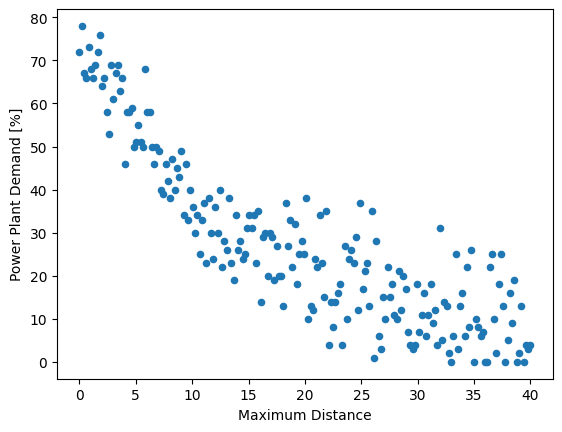

In [7]:
ax = df.plot(x='max_distance',y='pp_demanded',kind='scatter')
ax.set_xlabel('Maximum Distance')
ax.set_ylabel('Power Plant Demand [%]')

Text(0, 0.5, 'Production Waste [%]')

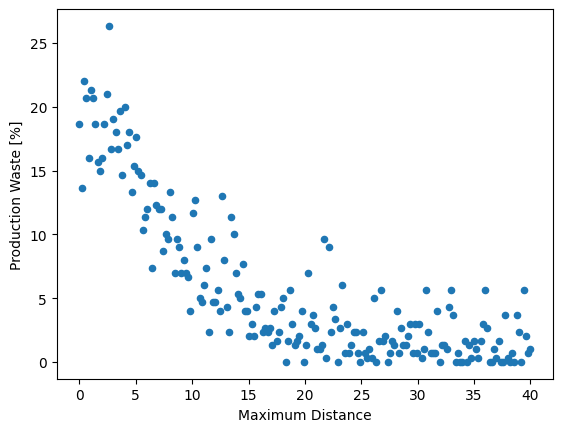

In [8]:
ax = df.plot(x='max_distance',y='production_eff',kind='scatter')
ax.set_xlabel('Maximum Distance')
ax.set_ylabel('Production Waste [%]')

Text(0, 0.5, 'Production Waste [%]')

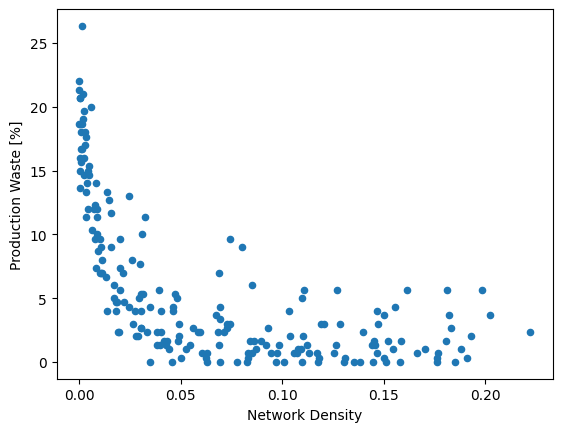

In [13]:
ax = df.plot(x='density',y='production_eff',kind='scatter')
ax.set_xlabel('Network Density')
ax.set_ylabel('Production Waste [%]')